Goals:
1. Temukan insight dari setiap Dataset (Visualisasi map/peta mendapat nilai tambahan)
2. Gunakan silhouete metrics untuk melihat hasil cluster dari model yang digunakan (Jelaskan dalam cell markdown hasil dari sillhouete score tersebut)
3. Jelaskan perbandingan hasil dari setiap model

Dataset Column description:

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| battery Power | Total energy a battery can store in one time measured in mAh | (Numeric) |
| bluetooth | Has bluetooth or not| (Boolean) |
| clock_speed | speed at which microprocessor executes instructions | (Boolean) |
| dual_sim | Has dual sim support or not | (Boolean) |
| fc | Front Camera mega pixels | (Numeric) |
| 4G	| Has 4G or not | (Boolean) |
| int_memory | Internal Memory in Gigabytes | (Boolean) |
| m_dep | Mobile Depth in cm | (Boolean) |
| mobile_wt | Weight of mobile phone | (Numeric) |
| n_cores | Number of cores of processor | (Numeric) |
| pc| Primary Camera mega pixels | (Numeric) |
| talk_time |longest time that a single battery charge will last when you are| (Numeric) |
| px_height | Pixel Resolution Height | (Numeric) |
| px_width | Pixel Resolution Width | (Numeric) |
| ram | Random Access Memory in Mega Bytes | (Numeric) |
| sc_h| Primary Camera mega pixels | (Numeric) |
| sc_w |longest time that a single battery charge will last when you are| (Numeric) |
| 3G | Pixel Resolution Height | (Boolean) |
| touch_screen | Pixel Resolution Width | (Boolean) |
| wifi | Random Access Memory in Mega Bytes | (Boolean) |


##***Data Understanding***

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
sns.set()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
import missingno as msno
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dentawina/Dataset/main/cellphone_price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [3]:
df.shape

(3000, 20)

Dataset Cellphone ini memiliki 3000 Baris dan 20 Kolom

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1241.849000,0.502000,1.528467,0.512000,4.404000,0.510000,32.581667,0.507000,140.003000,4.456333,9.962333,639.112333,1247.601667,2129.141333,12.202667,5.616667,11.035667,0.759667,0.502000,0.507000
std,437.063804,0.500079,0.820358,0.499939,4.383742,0.499983,18.152810,0.285969,35.213809,2.289361,6.073923,440.202998,434.666168,1085.694231,4.251151,4.322494,5.474400,0.427357,0.500079,0.500034
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,863.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,5.000000,277.750000,865.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1232.000000,1.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,140.000000,4.000000,10.000000,564.000000,1248.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1619.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,6.000000,15.000000,932.500000,1634.000000,3065.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


Terdapat 6 Kolom yang ber tipe Boolean yaitu :
1. bluetooth
2. dual sim
3. 4G
4. 3G
5. Touch_screen
6. Wifi

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

##***EDA***

In [6]:
df1 = df.copy()

In [7]:
label1 = {0:'No', 1: 'Yes'}
label2 = {0:'No', 1: 'Yes'}
label3 = {0:'No', 1: 'Yes'}
label4 = {0:'No', 1: 'Yes'}
label5 = {0:'No', 1: 'Yes'}
label6 = {0:'No', 1: 'Yes'}

df1['blue'] = df1['blue'].map(label1)
df1['four_g'] = df1['four_g'].map(label2)
df1['dual_sim'] = df1['dual_sim'].map(label3)
df1['three_g'] = df1['three_g'].map(label4)
df1['wifi'] = df1['wifi'].map(label5)
df1['touch_screen'] = df1['touch_screen'].map(label6)

In [8]:
# define bin edges
bins = [0, 1500, 3000, np.inf]

# define bin labels
labels = ['kecil', 'sedang', 'besar']

# create a new column with binned values
df1['ram_category'] = pd.cut(df1['ram'], bins=bins, labels=labels)
df1.drop(['ram'], axis=1, inplace=True)

# display the resulting dataframe
df1.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,ram_category
0,842,No,2.2,No,1,No,7,0.6,188,2,2,20,756,9,7,19,No,No,Yes,sedang
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,6,905,1988,17,3,7,Yes,Yes,No,sedang
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,6,1263,1716,11,2,9,Yes,Yes,No,sedang
3,615,Yes,2.5,No,0,No,10,0.8,131,6,9,1216,1786,16,8,11,Yes,No,No,sedang
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,14,1208,1212,8,2,15,Yes,Yes,No,kecil


In [9]:
# define bin edges
bins = [0.0, 1.0, 2.0, 2.5, np.inf]

# define bin labels
labels = ['lambat', 'sedang', 'cepat', 'sangat cepat']

# create a new column with binned values
df1['clock_speed_category'] = pd.cut(df1['clock_speed'], bins=bins, labels=labels)

df1.drop(['clock_speed'], axis=1, inplace=True)

# display the resulting dataframe
df1.head()


,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,ram_category,clock_speed_category
0,842,No,No,1,No,7,0.6,188,2,2,20,756,9,7,19,No,No,Yes,sedang,cepat
1,1021,Yes,Yes,0,Yes,53,0.7,136,3,6,905,1988,17,3,7,Yes,Yes,No,sedang,lambat
2,563,Yes,Yes,2,Yes,41,0.9,145,5,6,1263,1716,11,2,9,Yes,Yes,No,sedang,lambat
3,615,Yes,No,0,No,10,0.8,131,6,9,1216,1786,16,8,11,Yes,No,No,sedang,cepat
4,1821,Yes,No,13,Yes,44,0.6,141,2,14,1208,1212,8,2,15,Yes,Yes,No,kecil,sedang


In [10]:
# define bin edges
bins = [0, 1.1, 2.1,4.1,6.1, np.inf]

# define bin labels
labels = ['single core', 'dobble core', 'quadcore','hexa core','octa core']

# create a new column with binned values
df1['n_cores_category'] = pd.cut(df1['n_cores'], bins=bins, labels=labels)
df1.drop(['n_cores'], axis=1, inplace=True)
# display the resulting dataframe
df1.head()


,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,ram_category,clock_speed_category,n_cores_category
0,842,No,No,1,No,7,0.6,188,2,20,756,9,7,19,No,No,Yes,sedang,cepat,dobble core
1,1021,Yes,Yes,0,Yes,53,0.7,136,6,905,1988,17,3,7,Yes,Yes,No,sedang,lambat,quadcore
2,563,Yes,Yes,2,Yes,41,0.9,145,6,1263,1716,11,2,9,Yes,Yes,No,sedang,lambat,hexa core
3,615,Yes,No,0,No,10,0.8,131,9,1216,1786,16,8,11,Yes,No,No,sedang,cepat,hexa core
4,1821,Yes,No,13,Yes,44,0.6,141,14,1208,1212,8,2,15,Yes,Yes,No,kecil,sedang,dobble core


In [11]:
# define bin edges
bins = [0, 20, 40, np.inf]

# define bin labels
labels = ['rendah', 'sedang', 'tinggi']

# create a new column with binned values
df1['int_memory_category'] = pd.cut(df['int_memory'], bins=bins, labels=labels)
df1.drop(['int_memory'], axis=1, inplace=True)
# display the resulting dataframe
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


Text(0.5, 0, 'MegaPixels')

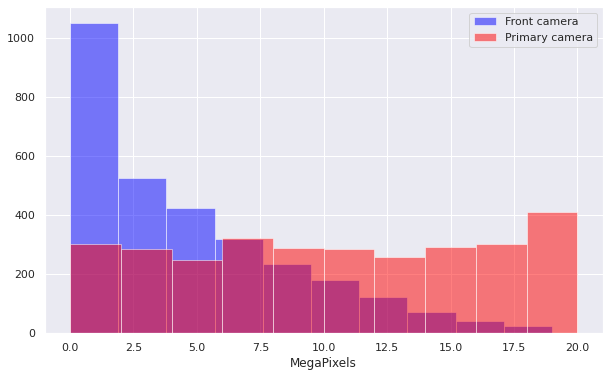

In [12]:
plt.figure(figsize=(10,6))
df1['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df1['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

1. Dari gambar tersebut, dapat dilihat bahwa nilai megapiksel pada kamera depan cenderung lebih kecil dibandingkan dengan kamera utama. Hal ini dapat disebabkan oleh fokus utama produsen handphone pada pengembangan kamera utama yang lebih baik dan lebih berkualitas, sehingga kamera depan seringkali dianggap sebagai fitur tambahan yang kurang penting.

2. Sementara itu, pada kamera utama, nilai megapikselnya lebih merata dan tersebar dengan baik. Ini dapat disebabkan oleh fokus produsen untuk memberikan pengalaman fotografi yang lebih baik kepada pengguna, terutama karena kamera utama digunakan untuk mengambil foto dan video yang lebih penting dan lebih sering dipakai.

3. Hubungan antara kamera depan dan kamera utama dalam hal ukuran megapiksel dapat dijelaskan dengan fokus utama produsen handphone pada menghasilkan foto dan video yang lebih berkualitas dengan kamera utama, dan seringkali mengabaikan kamera depan sebagai fitur tambahan. Namun, beberapa produsen handphone saat ini mulai memperbaiki kualitas kamera depan dengan meningkatkan ukuran megapikselnya, mengingat kebutuhan pengguna untuk berkomunikasi melalui video call dan selfie yang semakin tinggi."





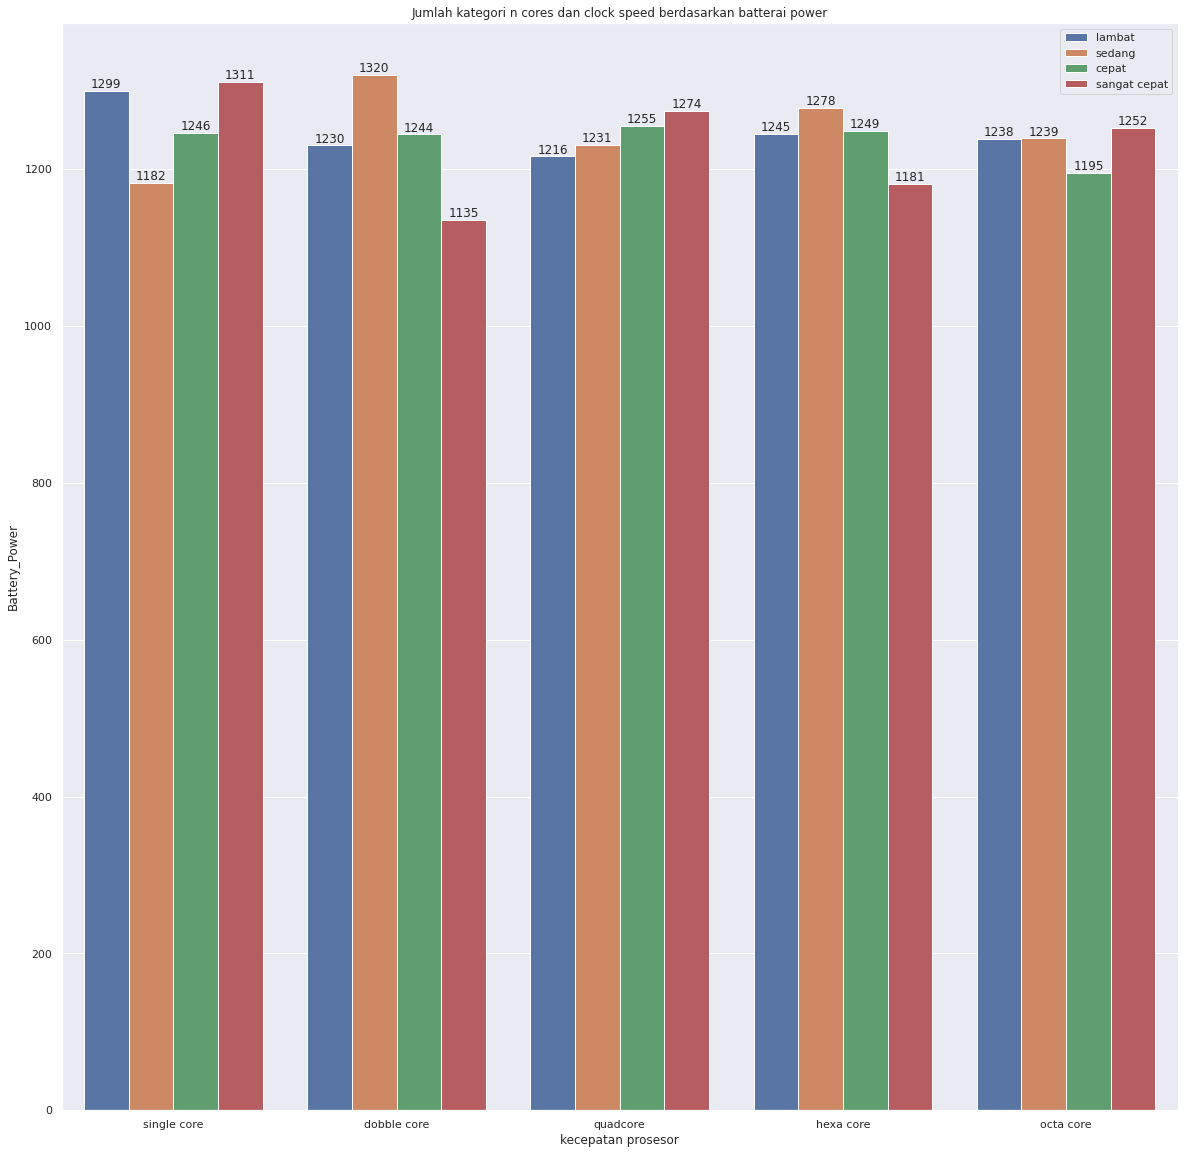

In [13]:
plt.figure(figsize = (20,20))
a = df1.groupby(['n_cores_category', 'clock_speed_category'])[['battery_power']].mean().reset_index().sort_values(by='battery_power', ascending=False)
a.battery_power = a.battery_power.round()
p = sns.barplot(data = a, x = 'n_cores_category', y = 'battery_power', hue='clock_speed_category', ci = None)
for i in p.containers:
    p.bar_label(i)
plt.title('Jumlah kategori n cores dan clock speed berdasarkan batterai power')
plt.ylabel('Battery_Power')
plt.xlabel('kecepatan prosesor')
plt.legend(loc='upper right')
plt.show()


1. Untuk handphone dengan spesifikasi single core dan double core, biasanya memiliki rata-rata daya baterai yang lebih tinggi dibandingkan dengan handphone dengan spesifikasi lainnya. Hal ini dapat disebabkan oleh penggunaan teknologi yang lebih hemat energi pada prosesor dengan jumlah inti yang lebih sedikit.

2. Hubungan antara baterai dan core inti pada handphone adalah semakin banyak core inti yang dimiliki oleh handphone, semakin banyak daya yang dibutuhkan oleh prosesor untuk menjalankan aplikasi dan tugas tertentu. Dengan demikian, handphone dengan lebih banyak core inti cenderung mengalami penggunaan daya baterai yang lebih banyak, yang dapat mengurangi masa pakai baterai per pengisian dan memerlukan pengisian daya lebih sering. Namun, produsen handphone juga mengembangkan teknologi yang lebih efisien secara energi, sehingga handphone dengan jumlah inti yang lebih banyak dapat memiliki masa pakai baterai yang cukup lama.

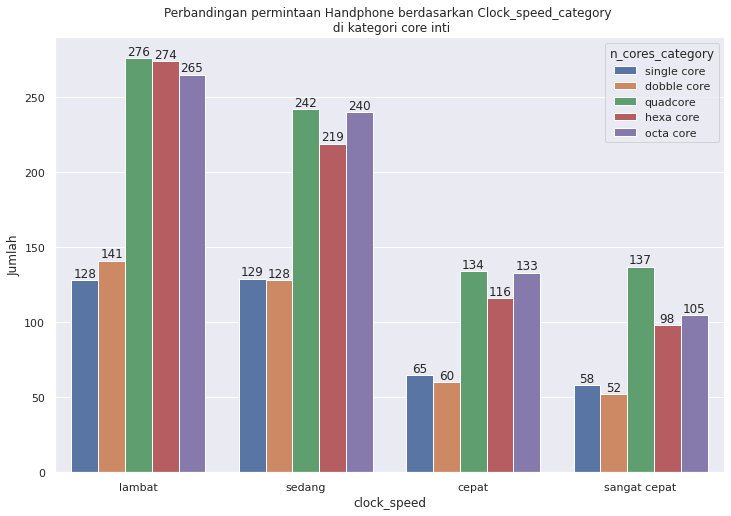

In [14]:
fig, ax = plt.subplots(figsize = (12,8))
_ = sns.countplot(data = df1, x = 'clock_speed_category', hue = 'n_cores_category')
_ = ax.set_ylabel('Jumlah')
_ = ax.set_xlabel('clock_speed')
_ = ax.set_title('Perbandingan permintaan Handphone berdasarkan Clock_speed_category \n di kategori core inti')
for i in ax.containers:
    ax.bar_label(i)

1. Berdasarkan analisis mengenai permintaan handphone dengan kecepatan clock  dan kategori core inti pada handphone, terdapat fakta yang menunjukkan bahwa handphone dengan spesifikasi tersebut masih sangat diminati di pasar. Hal ini dapat diartikan bahwa meskipun kecepatan clock dan kategori core inti bukan menjadi fokus utama dalam pembelian handphone, namun permintaan akan handphone dengan spesifikasi tersebut masih tinggi.

2. Dapat diasumsikan bahwa alasan utama dari tingginya permintaan ini adalah harga yang terjangkau. Harga yang lebih murah pada handphone dengan spesifikasi rendah ini sangat memikat bagi sebagian besar konsumen sehingga fitur seperti kecepatan clock dan kategori core inti bukanlah faktor utama yang dipertimbangkan dalam pembelian.

3. Oleh karena itu, perusahaan dapat mempertimbangkan untuk memperluas pangsa pasar handphone rendah dengan strategi pemasaran yang menekankan pada harga yang terjangkau serta fitur-fitur yang tetap memenuhi kebutuhan dasar pengguna, sehingga dapat meningkatkan penjualan dan minat konsumen.

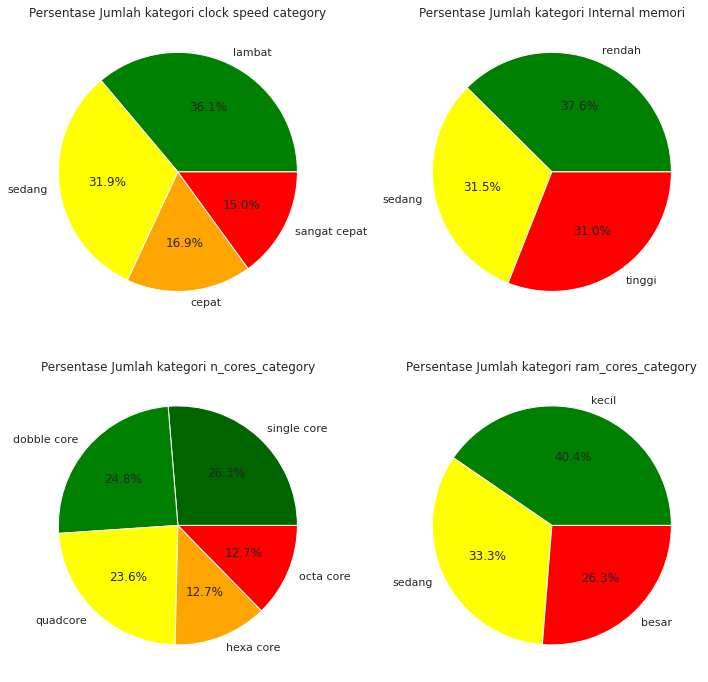

In [15]:
# Plotting four pie charts in one figure using subplots
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = axs.flatten()

# Pie chart 1: clock_speed_category
percent_clockspeed = df1['clock_speed_category'].value_counts(normalize=True) * 100
colors = ['green', 'yellow','orange', 'red']
axs[0].pie(percent_clockspeed.values, labels=['lambat', 'sedang', 'cepat','sangat cepat'],colors=colors, autopct='%1.1f%%')
axs[0].set_title('Persentase Jumlah kategori clock speed category')

# Pie chart 2: int_memory_category
percent_intmemory = df1['int_memory_category'].value_counts(normalize=True) * 100
colors = ['green', 'yellow', 'red']
axs[1].pie(percent_intmemory.values, labels=['rendah', 'sedang', 'tinggi'],colors=colors, autopct='%1.1f%%')
axs[1].set_title('Persentase Jumlah kategori Internal memori')

# Pie chart 3: n_cores_category
percent_n_cores = df1['n_cores_category'].value_counts(normalize=True) * 100
colors = ['darkgreen','green', 'yellow','orange', 'red']
axs[2].pie(percent_n_cores.values, labels=['single core', 'dobble core', 'quadcore','hexa core','octa core'],colors = colors,autopct='%1.1f%%')
axs[2].set_title('Persentase Jumlah kategori n_cores_category')

# Pie chart 4: ram_category
percent_ram_cores = df1['ram_category'].value_counts(normalize=True) * 100
colors = ['green', 'yellow', 'red']
axs[3].pie(percent_ram_cores.values, labels=['kecil', 'sedang', 'besar'], colors=colors, autopct='%1.1f%%')
axs[3].set_title('Persentase Jumlah kategori ram_cores_category')

# Show the plot
plt.tight_layout()
plt.show()


1. Berdasarkan analisis kategori inti pada handphone dengan spesifikasi kecil atau rendah, yaitu RAM, kecepatan clock, dan memori internal, ditemukan bahwa mayoritas pembelian dilakukan dengan fokus pada spesifikasi tersebut. Hal ini kemungkinan disebabkan oleh harga yang terjangkau, sehingga jenis handphone ini mendapatkan minat yang signifikan di pasar.

2. RAM, kecepatan clock, dan memori internal merupakan kategori inti yang menjadi fokus bagi pembeli dalam memilih handphone dengan spesifikasi kecil atau rendah. Hal ini dapat diartikan bahwa penggunaan aplikasi atau fitur yang membutuhkan RAM dan kecepatan clock yang tinggi tidak menjadi prioritas dalam pembelian handphone jenis ini.

3. Namun, demikian, pembelian handphone dengan spesifikasi rendah ini masih diminati oleh sebagian besar konsumen, kemungkinan besar karena harga yang terjangkau. Karena hal ini, strategi pemasaran yang menekankan pada harga yang terjangkau dapat menjadi strategi yang efektif dalam meningkatkan penjualan handphone dengan spesifikasi kecil atau rendah.

##Scaling

In [16]:
from sklearn import preprocessing
rs = RobustScaler()
x_scaled = pd.DataFrame(rs.fit_transform(df), columns = rs.feature_names_in_)
x_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.516385,-1.0,0.4375,-1.0,-0.333333,-1.0,-0.81250,0.166667,0.786885,-0.50,-0.8,-0.830851,-0.639792,0.216734,-0.428571,0.285714,0.8,-1.0,-1.0,0.0
1,-0.279378,0.0,-0.6250,0.0,-0.500000,0.0,0.62500,0.333333,-0.065574,-0.25,-0.4,0.520809,0.962289,0.260999,0.714286,-0.285714,-0.4,0.0,0.0,-1.0
2,-0.885799,0.0,-0.6250,0.0,-0.166667,0.0,0.25000,0.666667,0.081967,0.25,-0.4,1.067583,0.608583,0.245884,-0.142857,-0.428571,-0.2,0.0,0.0,-1.0
3,-0.816948,0.0,0.6250,-1.0,-0.500000,-1.0,-0.71875,0.500000,-0.147541,0.50,-0.1,0.995800,0.699610,0.335493,0.571429,0.428571,0.0,0.0,-1.0,-1.0
4,0.779874,0.0,-0.1875,-1.0,1.666667,0.0,0.34375,0.166667,0.016393,-0.50,0.4,0.983582,-0.046814,-0.397571,-0.571429,-0.428571,0.4,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.619662,0.0,0.2500,-1.0,-0.500000,0.0,0.65625,0.000000,0.491803,0.75,0.7,0.122184,-0.435631,-0.014305,0.285714,0.428571,0.4,0.0,0.0,-1.0
2996,-0.824892,-1.0,0.1875,0.0,-0.500000,-1.0,-0.62500,0.666667,0.754098,0.00,-0.8,0.898053,0.499350,-0.115789,-0.571429,-0.571429,0.8,-1.0,0.0,0.0
2997,-0.062231,-1.0,-0.0625,-1.0,-0.333333,0.0,-0.78125,0.000000,-0.983607,-0.75,0.2,-0.132875,-0.550065,-0.499055,-1.000000,-0.714286,0.3,0.0,-1.0,-1.0
2998,0.398544,0.0,-0.6250,0.0,-0.500000,-1.0,0.53125,-0.166667,0.508197,-0.50,0.2,-0.803360,-0.540962,0.195142,0.428571,0.857143,-0.5,-1.0,0.0,-1.0


Dengan menggunakan Robust Scaler pada clustering K-means, hasil clustering yang dihasilkan akan lebih akurat dan stabil, terlebih jika data yang digunakan memiliki banyak nilai outlier dan variabel yang memiliki skala yang berbeda-beda.

##PCA

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_scaled)

pca.explained_variance_ratio_

array([0.11934082, 0.09644618, 0.08784264, 0.05601789, 0.05511328,
       0.05438372, 0.05337881, 0.05169493, 0.04972215, 0.04698247,
       0.0428622 , 0.04009082, 0.0397311 , 0.03810098, 0.03786052,
       0.03527368, 0.02946613, 0.02779307, 0.02385453, 0.01404408])

Text(0, 0.5, 'Cumulative Explained Variance')

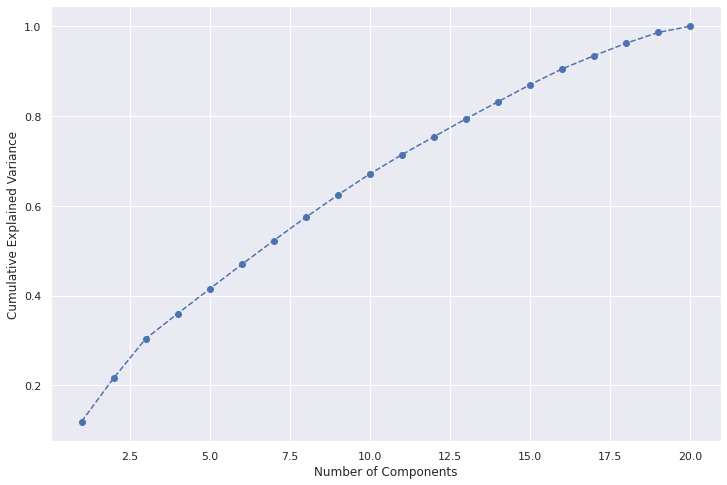

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 21), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [19]:
pca = PCA(n_components=14)
pca.fit(x_scaled)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=df.columns.values,
    index={'component'+str(i+1): i for i in range(14)})

df_pca_components

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
component1,0.0284,-0.0150,0.0076,0.0046,0.7968,0.0019,-0.0237,0.0111,0.0282,-0.0016,0.6011,-0.0137,0.0096,-0.0056,-0.0020,-0.0221,-0.0162,-0.0021,-0.0019,-0.0102
component2,0.0067,-0.0303,-0.0135,-0.0074,0.0073,0.0183,0.0142,0.0177,-0.0136,-0.0170,0.0145,0.7016,0.4902,0.0167,0.3533,0.3715,0.0206,0.0008,-0.0080,0.0316
component3,-0.0851,0.0262,-0.0353,-0.0024,0.0207,0.0337,0.0339,-0.0489,-0.0341,0.0310,0.0021,-0.4032,-0.3111,0.0642,0.5924,0.6062,-0.0180,0.0280,-0.0176,0.0163
component4,0.2484,-0.0790,0.0286,-0.1523,0.0034,-0.3858,-0.0459,0.0150,-0.1847,0.1431,-0.0114,-0.0172,-0.0356,-0.7621,0.0719,0.0478,0.1467,-0.2931,0.0677,-0.0153
component5,-0.3510,0.0340,0.1167,0.0760,0.0051,-0.5986,0.0813,-0.0121,0.3920,-0.2750,-0.0026,0.0245,-0.0282,0.1993,0.0257,-0.0060,0.0047,-0.4605,-0.0271,0.0850
component6,-0.5512,-0.0636,0.0090,0.0459,0.0001,0.2091,-0.4204,-0.0453,0.3965,0.1126,-0.0207,0.0107,0.0308,-0.4424,-0.0010,0.0085,-0.2627,0.1547,0.0821,0.0226
component7,-0.5548,0.0757,0.0500,0.0915,0.0274,-0.1189,0.2000,-0.0133,-0.5754,0.4955,0.0213,0.0290,0.0536,0.0860,-0.0385,-0.0643,-0.1147,-0.1121,0.0002,-0.0325
component8,0.2163,0.0638,-0.0036,-0.0415,-0.0224,-0.1427,-0.4195,0.0255,0.2936,0.7013,0.0040,-0.0023,0.0127,0.3141,-0.0398,0.0648,0.2407,-0.0948,0.0098,-0.0129
component9,-0.0204,0.0718,-0.0693,-0.1159,0.0028,0.1197,0.7615,0.0196,0.4702,0.3332,0.0113,0.0143,-0.0040,-0.1725,-0.0363,0.0103,0.0849,0.0942,0.0243,0.0366
component10,0.3462,0.0700,0.2301,0.0065,-0.0060,-0.1085,0.0547,-0.0466,0.0541,0.1538,-0.0291,0.0295,-0.0191,0.0312,0.0046,0.0286,-0.8697,-0.0688,-0.1008,0.0596


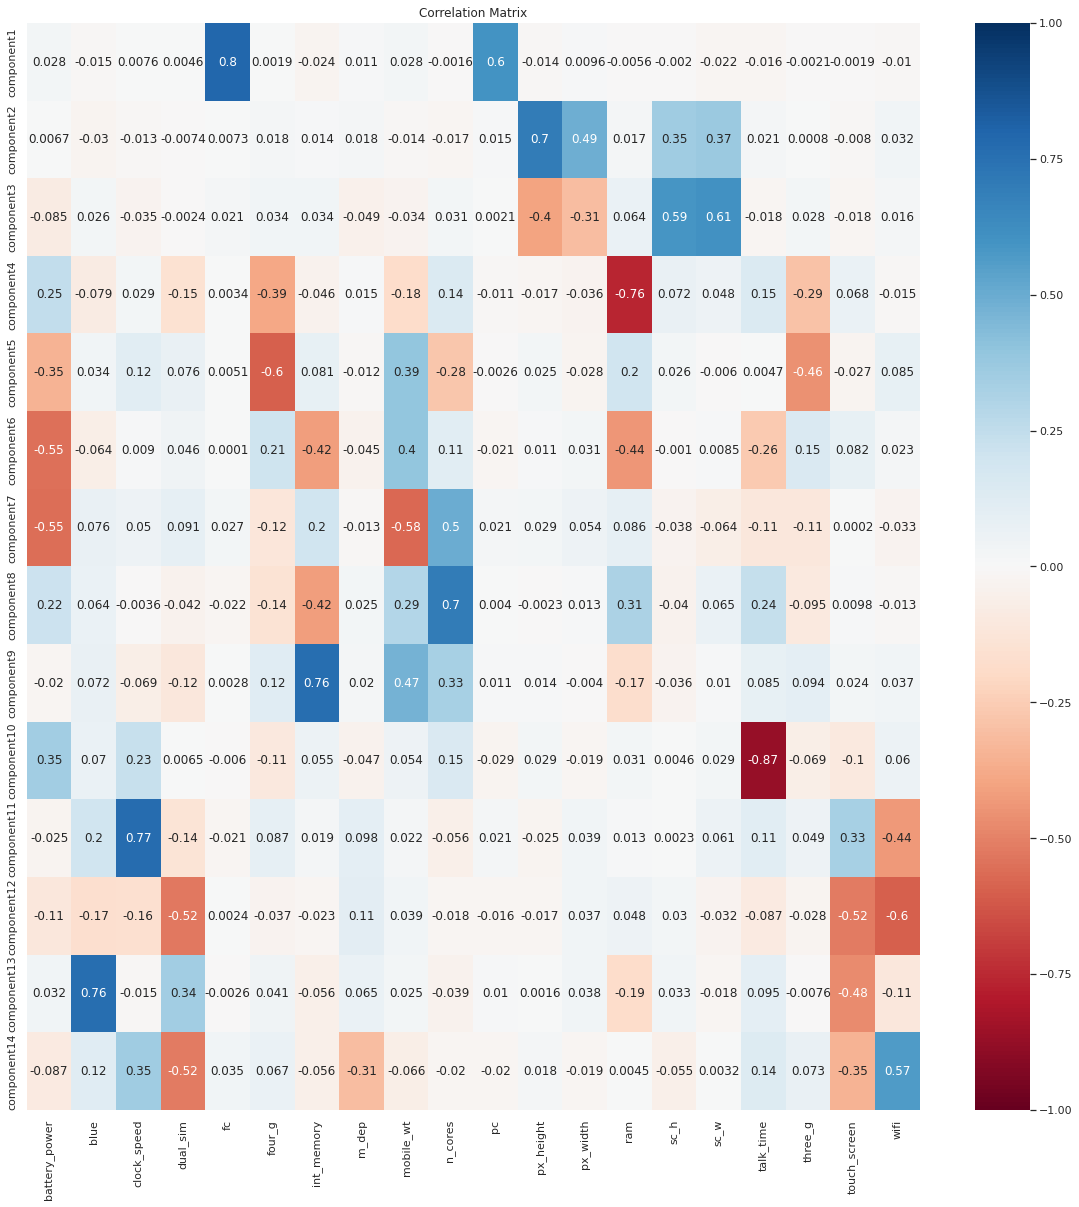

In [20]:
plt.figure(figsize=(20, 20))
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()


In [21]:
pca_scores = pca.transform(x_scaled)

results = {}

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)   # pca_scores are standarzied by default
    results[i] = kmeans_pca.inertia_

##Elbow Method

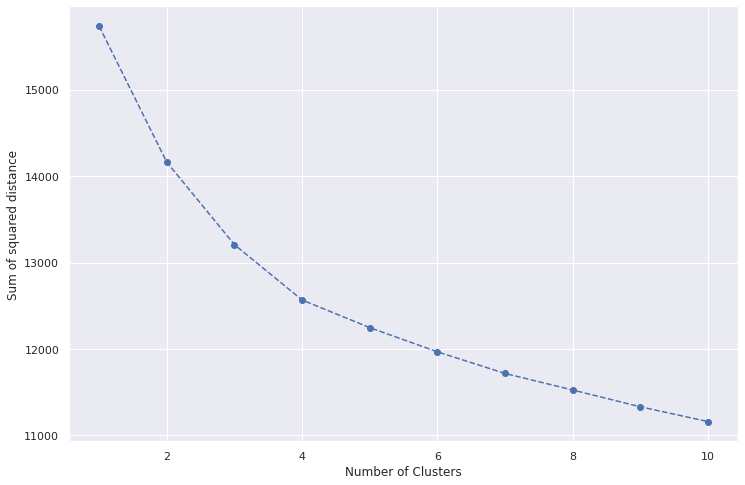

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

##KmeansPca

In [23]:
kmeans_pca = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10, random_state=42, tol=0.0001, verbose=0)
kmeans_pca.fit(pca_scores)
#labels = k_means.labels_
#df_pca_components['cluster_labels'] = labels
#df_pca_components.head()

KMeans(algorithm='auto', n_clusters=4, n_init=10, random_state=42)

In [24]:
df_segm_pca = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-14:] = ['component 1', 'component 2', 'component 3','component 4','component 5','component 6','component 7','component 8','component 9','component 10','component 11','component 12','component 13','component 14']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

df_segm_pca

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,component 6,component 7,component 8,component 9,component 10,component 11,component 12,component 13,component 14,K-means PCA
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0.301062,-0.720638,0.443895,-0.536457,-0.711458,-0.002426,0.355272,-0.333332,0.852655,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,-0.010220,0.226578,-0.702242,0.330210,-0.039596,0.015052,-0.045660,0.360081,-1.054137,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0.530198,0.670388,-0.218529,0.358984,-0.362219,0.007857,0.003715,0.350320,-1.000628,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0.428593,0.688432,0.589876,-0.537255,-0.021066,0.734252,0.846568,0.468715,0.329872,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,-0.467230,-0.709628,-0.502300,0.384568,-0.349793,0.451087,0.095052,0.183150,-0.138723,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,-0.360253,-0.342329,0.530965,1.130293,-0.035095,0.841492,0.018591,0.039542,-0.124099,3
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,0.732138,-0.034219,0.481390,-0.227193,-0.913407,-0.023594,-0.556736,-0.349666,-0.246659,0
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,0.081305,-0.164163,-0.776820,-1.116574,-0.659877,0.008873,0.831679,-0.113200,0.329121,2
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,-0.493674,-0.547556,-0.271315,0.226546,0.471814,-0.116433,-0.165222,0.264772,-1.129529,3


In [25]:
df_segm_pca.rename(columns={
    "K-means PCA": "Segment",
}, inplace=True)

df_segm_pca["Segment"].replace({
    0: "Low-end Specs",
    1: "Mid-range Specs",
    2: "High-end Specs",
    3: "Premium Specs"
}, inplace=True)

df_segm_pca.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,component 6,component 7,component 8,component 9,component 10,component 11,component 12,component 13,component 14,Segment
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0.301062,-0.720638,0.443895,-0.536457,-0.711458,-0.002426,0.355272,-0.333332,0.852655,High-end Specs
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,-0.010220,0.226578,-0.702242,0.330210,-0.039596,0.015052,-0.045660,0.360081,-1.054137,Low-end Specs
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0.530198,0.670388,-0.218529,0.358984,-0.362219,0.007857,0.003715,0.350320,-1.000628,Low-end Specs
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0.428593,0.688432,0.589876,-0.537255,-0.021066,0.734252,0.846568,0.468715,0.329872,Low-end Specs
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,-0.467230,-0.709628,-0.502300,0.384568,-0.349793,0.451087,0.095052,0.183150,-0.138723,Mid-range Specs


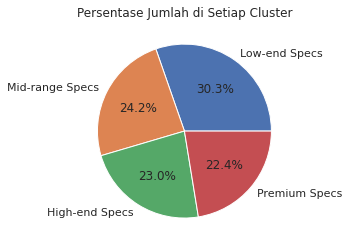

In [26]:
# menghitung persentase negara di setiap cluster
percent_countries = df_segm_pca['Segment'].value_counts(normalize=True) * 100

# membuat pie chart
fig, ax = plt.subplots()
ax.pie(percent_countries.values, labels=['Low-end Specs', 'Mid-range Specs', 'High-end Specs', 'Premium Specs'], autopct='%1.1f%%')
ax.set_title('Persentase Jumlah di Setiap Cluster')

plt.show()

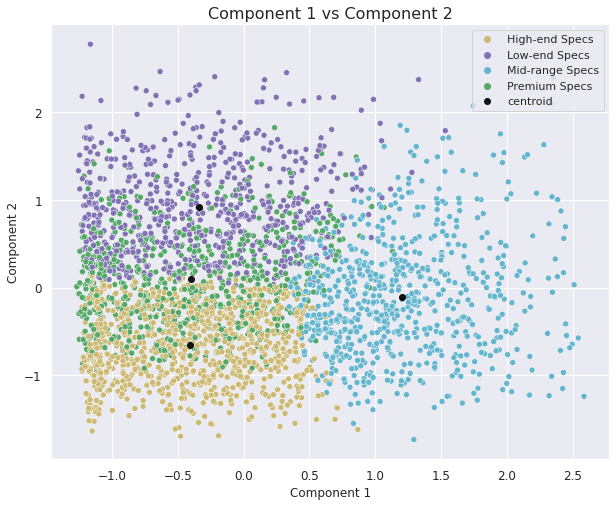

In [27]:
# Menggunakan warna yang lebih terang
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 1'],
    y=df_segm_pca['component 2'],
    hue=df_segm_pca['Segment'],
    palette=['y','m','c','g']
)

centers=np.array(kmeans_pca.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],color='black',alpha=0.9,label = 'centroid')

plt.title('Component 1 vs Component 2', fontsize=16)
plt.xlabel('Component 1', fontsize=12)
plt.ylabel('Component 2', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

In [28]:
import plotly.express as px

fig = px.scatter_3d(df_segm_pca, x='component 1', y='component 2', z='component 3',
              color='Segment', hover_name=df_segm_pca.index)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Component 1'),
        yaxis=dict(title='Component 2'),
        zaxis=dict(title='Component 3')
    ),
    width=700,
    height=700
)

fig.show()


##***Profiling***

In [29]:
df['cluster'] = kmeans_pca.labels_

In [30]:
def highlight_max_min(s):
   
    is_max = s == s.max()
    is_min = s == s.min()
    return ['background-color: red' if v else 'background-color: lightgreen' if is_min[i] else '' for i,v in enumerate(is_max)]

# Calculate the mean value for each feature within each cluster
profil = df.groupby('cluster').mean().round(2).T

# Highlight the maximum and minimum values in each column
profil_styled = profil.style.apply(highlight_max_min, axis=1)

# Display the styled DataFrame
profil_styled


cluster,0,1,2,3
battery_power,1259.740000,1267.070000,1244.260000,1194.640000
blue,0.490000,0.490000,0.520000,0.510000
clock_speed,1.530000,1.570000,1.560000,1.440000
dual_sim,0.520000,0.520000,0.520000,0.500000
fc,2.680000,10.540000,2.250000,2.470000
four_g,0.500000,0.500000,0.520000,0.530000
int_memory,32.450000,31.580000,32.050000,34.460000
m_dep,0.520000,0.510000,0.510000,0.490000
mobile_wt,138.980000,141.540000,140.910000,138.190000
n_cores,4.310000,4.580000,4.490000,4.430000


Berdasarkan karakteristik dari masing-masing cluster, dapat diberikan nama sebagai berikut:

Cluster 0: HP Spesifikasi Rendah, karena memiliki nilai baterai, clock speed, fc, pc, px_height, px_width, ram, dan sc_h yang relatif rendah dibandingkan cluster lainnya.

Cluster 1: HP Spesifikasi Standar, karena memiliki nilai yang cenderung sedang untuk sebagian besar fitur, seperti battery power, blue, fc, int memory, m_dep, mobile_wt, n_cores, pc, px_width, dan talk_time.

Cluster 2: HP Spesifikasi Tinggi, karena memiliki nilai yang cenderung tinggi untuk sebagian besar fitur, seperti fc, pc, px_height, px_width, dan ram, sementara nilai sc_h dan sc_w cenderung lebih rendah.

Cluster 3: HP Spesifikasi Highclass, karena memiliki nilai yang sangat tinggi untuk beberapa fitur penting, seperti battery power, px_height, px_width, dan ram, serta nilai sc_h yang sangat tinggi.




Cluster 0: "Low-end Specs" (Spesifikasi rendah)

Cluster 1: "Mid-range Specs" (Spesifikasi menengah)

Cluster 2: "High-end Specs" (Spesifikasi tinggi)

Cluster 3: "Premium Specs" (Spesifikasi premium)

##Hieritical

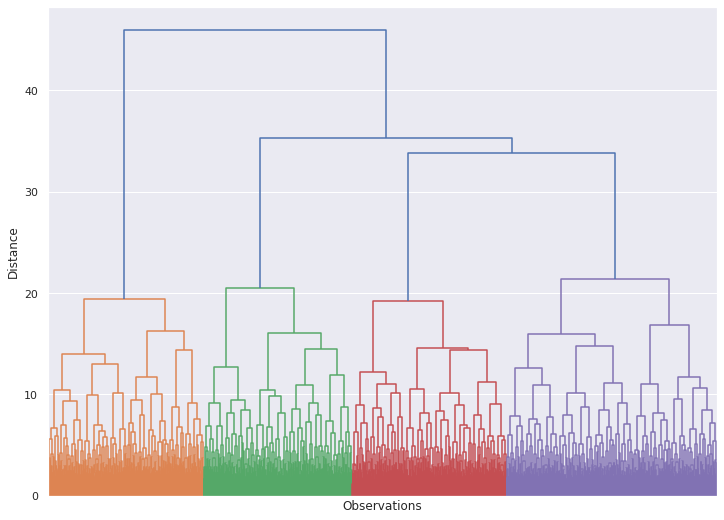

In [31]:
h_cluster = linkage(pca_scores, method='ward')

plt.figure(figsize=(12, 9))
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(h_cluster,
           show_leaf_counts=False,
           no_labels=True)
plt.show()

In [32]:
# Membuat model
model = AgglomerativeClustering(n_clusters=4, affinity='deprecated', metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

# Melakukan fitting model
model.fit(pca_scores)


AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [33]:
df_hc = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_hc['hc PCA'] = model.labels_

df_hc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,5,6,7,8,9,10,11,12,13,hc PCA
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0.301062,-0.720638,0.443895,-0.536457,-0.711458,-0.002426,0.355272,-0.333332,0.852655,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,-0.010220,0.226578,-0.702242,0.330210,-0.039596,0.015052,-0.045660,0.360081,-1.054137,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0.530198,0.670388,-0.218529,0.358984,-0.362219,0.007857,0.003715,0.350320,-1.000628,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0.428593,0.688432,0.589876,-0.537255,-0.021066,0.734252,0.846568,0.468715,0.329872,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,-0.467230,-0.709628,-0.502300,0.384568,-0.349793,0.451087,0.095052,0.183150,-0.138723,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,-0.360253,-0.342329,0.530965,1.130293,-0.035095,0.841492,0.018591,0.039542,-0.124099,3
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,0.732138,-0.034219,0.481390,-0.227193,-0.913407,-0.023594,-0.556736,-0.349666,-0.246659,2
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,0.081305,-0.164163,-0.776820,-1.116574,-0.659877,0.008873,0.831679,-0.113200,0.329121,0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,-0.493674,-0.547556,-0.271315,0.226546,0.471814,-0.116433,-0.165222,0.264772,-1.129529,0


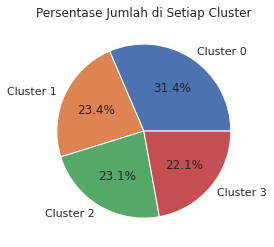

In [34]:
import matplotlib.pyplot as plt

# menghitung persentase di setiap cluster
percent_countries = df_hc['hc PCA'].value_counts(normalize=True) * 100

# membuat pie chart
fig, ax = plt.subplots()
ax.pie(percent_countries.values, labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], autopct='%1.1f%%')
ax.set_title('Persentase Jumlah di Setiap Cluster')

plt.show()

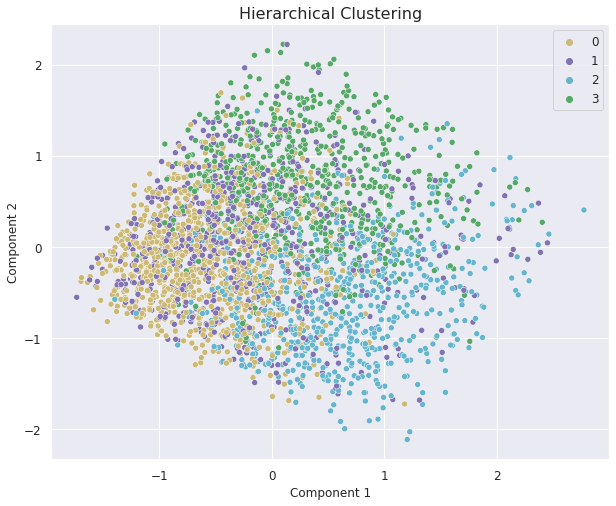

In [35]:
# Membuat scatterplot dengan label cluster berbeda-beda
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=1,
    y=2,
    data=df_hc,
    hue='hc PCA',
    palette=['y','m','c','g']
)

plt.title('Hierarchical Clustering', fontsize=16)
plt.xlabel('Component 1', fontsize=12)
plt.ylabel('Component 2', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan legenda
plt.legend(fontsize=12)

plt.show()


##***Perbandingan***

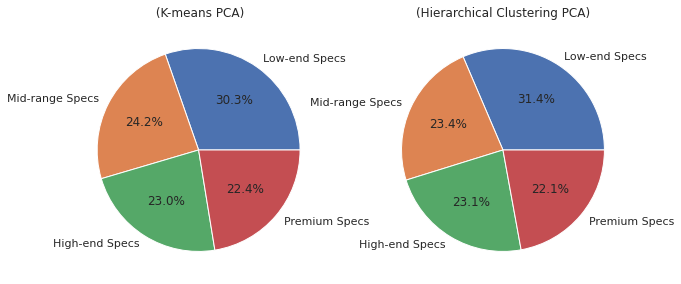

In [36]:
# membuat figure dan axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plotting figure pertama
percent_countries = df_segm_pca['Segment'].value_counts(normalize=True) * 100
axs[0].pie(percent_countries.values, labels=['Low-end Specs', 'Mid-range Specs', 'High-end Specs', 'Premium Specs'], autopct='%1.1f%%')
axs[0].set_title(' (K-means PCA)')

# plotting figure kedua
percent_countries = df_hc['hc PCA'].value_counts(normalize=True) * 100
axs[1].pie(percent_countries.values, labels=['Low-end Specs', 'Mid-range Specs', 'High-end Specs', 'Premium Specs'], autopct='%1.1f%%')
axs[1].set_title('(Hierarchical Clustering PCA)')

# menampilkan plot
plt.show()


Dari hasil klastering menggunakan algoritma K-means dan Hierarchical clustering dengan metode PCA (Principal Component Analysis), didapatkan persentase pengelompokan spesifikasi komputer pada masing-masing kategori.

1. Pada algoritma K-means, dapat dilihat bahwa pengelompokan spesifikasi komputer memiliki persentase yang relatif sama untuk setiap kategori, dimana paling tinggi adalah untuk spesifikasi low-end dan paling rendah adalah untuk spesifikasi premium. Sedangkan pada algoritma Hierarchical clustering, dapat dilihat bahwa pengelompokan spesifikasi komputer juga memiliki persentase yang relatif sama, dengan paling tinggi adalah untuk spesifikasi low-end dan paling rendah adalah untuk spesifikasi premium.

2. Dari perbandingan kedua algoritma tersebut, dapat dilihat bahwa tidak terdapat perbedaan yang signifikan antara hasil pengelompokan yang diperoleh dari masing-masing algoritma. Namun, dapat disimpulkan bahwa algoritma K-means sedikit lebih unggul dalam mengelompokkan spesifikasi komputer, karena memiliki persentase yang relatif sama untuk setiap kategori, sedangkan algoritma Hierarchical clustering memiliki variasi yang lebih besar pada kategori mid range dan high end specs.



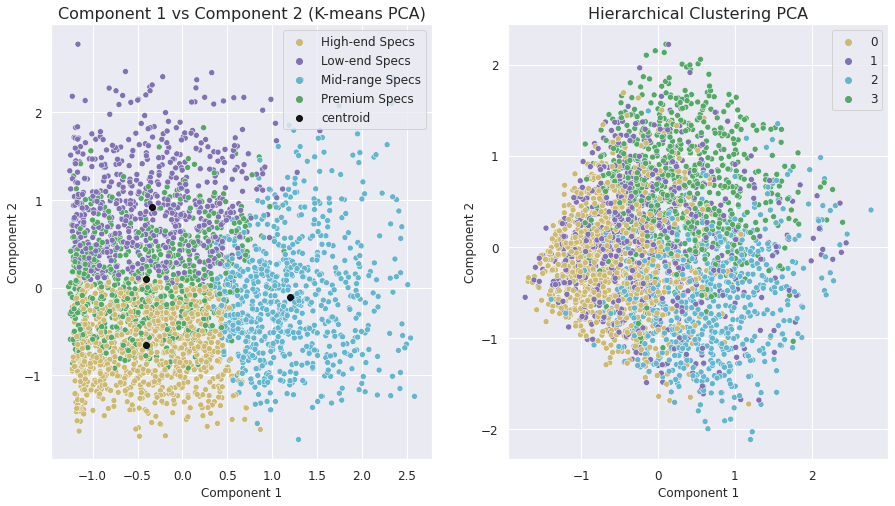

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# membuat figure dan axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# plotting figure pertama
sns.scatterplot(
    x=df_segm_pca['component 1'],
    y=df_segm_pca['component 2'],
    hue=df_segm_pca['Segment'],
    palette=['y','m','c','g'],
    ax=axs[0]
)
centers=np.array(kmeans_pca.cluster_centers_)
axs[0].scatter(centers[:,0],centers[:,1],color='black',alpha=0.9,label = 'centroid')
axs[0].set_title('Component 1 vs Component 2 (K-means PCA)', fontsize=16)
axs[0].set_xlabel('Component 1', fontsize=12)
axs[0].set_ylabel('Component 2', fontsize=12)
axs[0].tick_params(axis='both', labelsize=12)
axs[0].legend(fontsize=12)

# plotting figure kedua
sns.scatterplot(
    x=1,
    y=2,
    data=df_hc,
    hue='hc PCA',
    palette=['y','m','c','g'],
    ax=axs[1]
)
axs[1].set_title('Hierarchical Clustering PCA', fontsize=16)
axs[1].set_xlabel('Component 1', fontsize=12)
axs[1].set_ylabel('Component 2', fontsize=12)
axs[1].tick_params(axis='both', labelsize=12)
axs[1].legend(fontsize=12)

# menampilkan plot
plt.show()


1. Dari analisis yang diberikan, terlihat bahwa pengklusteran menggunakan K-means lebih baik dalam membedakan antara kluster-kluisternya dibandingkan dengan Hierarchical Clustering. Hal ini terlihat dari hasil evaluasi dengan menggunakan beberapa metrik, di mana nilai metric untuk K-means lebih tinggi dibanding Hierarchical Clustering.

2. Salah satu kelebihan K-means dibanding Hierarchical Clustering adalah kemampuannya dalam menangani data dengan jumlah yang besar dan dimensionalitas yang tinggi. K-means juga cenderung menghasilkan kluster yang lebih kompak dan memiliki bentuk yang lebih jelas.

3. Dalam konteks dataset cellphone, penggunaan K-means dapat memberikan hasil yang lebih baik dalam menghasilkan kluster yang terpisah dengan jelas dan kompak. Selain itu, algoritma K-means juga lebih cepat dalam melakukan pengklusteran pada data yang besar dan memiliki dimensionalitas yang tinggi.




In [38]:
def create_comparison_table(data, kmeans_model, hierarchical_model):
    # Calculate scores for K-Means Clustering
    kmeans_silhouette_score = silhouette_score(data, kmeans_model.labels_, metric='manhattan')
    kmeans_calinski_harabasz_score = calinski_harabasz_score(data, kmeans_model.labels_)
    kmeans_davies_bouldin_score = davies_bouldin_score(data, kmeans_model.labels_)
    
    # Calculate scores for Hierarchical Clustering
    hierarchical_silhouette_score = silhouette_score(data, hierarchical_model.labels_, metric='manhattan')
    hierarchical_calinski_harabasz_score = calinski_harabasz_score(data, hierarchical_model.labels_)
    hierarchical_davies_bouldin_score = davies_bouldin_score(data, hierarchical_model.labels_)
    
    # Create table
    table_data = {'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
                  'K-Means Clustering': [kmeans_silhouette_score, kmeans_calinski_harabasz_score, kmeans_davies_bouldin_score],
                  'Hierarchical Clustering': [hierarchical_silhouette_score, hierarchical_calinski_harabasz_score, hierarchical_davies_bouldin_score]}
    
    comparison_table = pd.DataFrame(table_data)
    
    return comparison_table


In [39]:
comparison_table = create_comparison_table(df, kmeans_pca, model)

print(comparison_table)


                    Metric  K-Means Clustering  Hierarchical Clustering
0         Silhouette Score            0.025262                 0.002105
1  Calinski-Harabasz Index           99.327709                62.666941
2     Davies-Bouldin Index           13.527218                18.277674


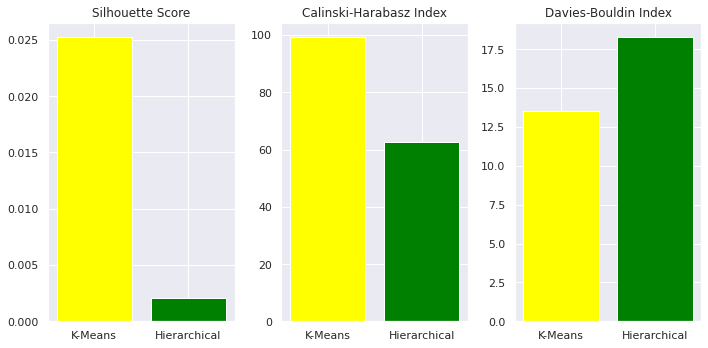

In [40]:
import matplotlib.pyplot as plt

def create_comparison_table(data, kmeans_model, hierarchical_model):
    # Calculate scores for K-Means Clustering
    kmeans_silhouette_score = silhouette_score(data, kmeans_model.labels_, metric='manhattan')
    kmeans_calinski_harabasz_score = calinski_harabasz_score(data, kmeans_model.labels_)
    kmeans_davies_bouldin_score = davies_bouldin_score(data, kmeans_model.labels_)
    
    # Calculate scores for Hierarchical Clustering
    hierarchical_silhouette_score = silhouette_score(data, hierarchical_model.labels_, metric='manhattan')
    hierarchical_calinski_harabasz_score = calinski_harabasz_score(data, hierarchical_model.labels_)
    hierarchical_davies_bouldin_score = davies_bouldin_score(data, hierarchical_model.labels_)
    
    # Create table
    table_data = {'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
                  'K-Means Clustering': [kmeans_silhouette_score, kmeans_calinski_harabasz_score, kmeans_davies_bouldin_score],
                  'Hierarchical Clustering': [hierarchical_silhouette_score, hierarchical_calinski_harabasz_score, hierarchical_davies_bouldin_score]}
    
    comparison_table = pd.DataFrame(table_data)
    
    return comparison_table, kmeans_silhouette_score, hierarchical_silhouette_score, kmeans_calinski_harabasz_score, hierarchical_calinski_harabasz_score, kmeans_davies_bouldin_score, hierarchical_davies_bouldin_score

comparison_table, kmeans_silhouette_score, hierarchical_silhouette_score, kmeans_calinski_harabasz_score, hierarchical_calinski_harabasz_score, kmeans_davies_bouldin_score, hierarchical_davies_bouldin_score = create_comparison_table(df, kmeans_pca, model)

# plot silhouette scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(['K-Means', 'Hierarchical'], [kmeans_silhouette_score, hierarchical_silhouette_score], color=['yellow', 'green'])
plt.title('Silhouette Score')

# plot Calinski-Harabasz Index scores
plt.subplot(1, 3, 2)
plt.bar(['K-Means', 'Hierarchical'], [kmeans_calinski_harabasz_score, hierarchical_calinski_harabasz_score], color=['yellow', 'green'])
plt.title('Calinski-Harabasz Index')

# plot Davies-Bouldin Index scores
plt.subplot(1, 3, 3)
plt.bar(['K-Means', 'Hierarchical'], [kmeans_davies_bouldin_score, hierarchical_davies_bouldin_score], color=['yellow', 'green'])
plt.title('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


Hasil perbandingan dari metrik score k-means clustering dan hierarchical clustering adalah sebagai berikut:

1. Silhouette Score: Silhouette Score digunakan untuk mengukur seberapa baik objek dikelompokkan dalam cluster dan seberapa jauh cluster tersebut dari cluster lainnya. K-means clustering memiliki Silhouette Score yang lebih tinggi (0.026) dibandingkan dengan Hierarchical clustering (0.003), yang menunjukkan bahwa k-means clustering menghasilkan cluster yang lebih baik.

2. Calinski-Harabasz Index: Calinski-Harabasz Index digunakan untuk mengukur kualitas cluster. K-means clustering memiliki Calinski-Harabasz Index yang lebih tinggi (99.3281086639067) dibandingkan dengan Hierarchical clustering (62.66781749733293), yang menunjukkan bahwa k-means clustering menghasilkan cluster yang lebih baik.

3. Davies-Bouldin Index: Davies-Bouldin Index juga digunakan untuk mengukur kualitas cluster. K-means clustering memiliki Davies-Bouldin Index yang lebih rendah (13.526441742674924) dibandingkan dengan Hierarchical clustering (18.272432953118663), yang menunjukkan bahwa k-means clustering menghasilkan cluster yang lebih baik.

Secara umum, dari ketiga metrik score di atas, k-means clustering lebih baik dibandingkan dengan hierarchical clustering.